# 2024 Reconocimiento de habla con Dynamic Time warping, dependiente de locutor, multilocutor e independiente del locutor: Parte 1, representación gráfica del programa de alineamiento DTW

In [ ]:
from google.colab import drive

# # Montar Google Drive
drive.mount('/content/drive')
import zipfile

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para realizar esta práctica es necesario hacer dos grabaciones en formato .wav. Esas dos grabaciones tendrán  el nombre "pata_xxx_1.wav"
y pata_xxx_2.wav
subir esas dos grabaciones a google colab dentro de la carpeta /content/pata que crearemos previamente

In [ ]:
# Para realizar esta práctica es necesario hacer dos grabaciones en formato .wav. Esas dos grabaciones tendrán  el nombre "pata_xxx_1.wav"
# y pata_xxx_2.wav

# subir esas dos grabaciones a google colab dentro de la carpeta /content/pata

import os
# # Obtener el directorio de trabajo actual

directorio_actual = os.getcwd()

# # Imprimir el directorio actual

print("Directorio actual:", directorio_actual)

directorio = '/content/drive/MyDrive/Procesamiento del habla/Práctica 2 - DTW/' #cambiar el nombre del directorio al directorio personal

# # Listar archivos en el directorio

archivos = os.listdir(directorio)

# # Imprimir la lista de archivos

for archivo in archivos:
  print(archivo)

Directorio actual: /content
practica_1.zip
2024-DTW- grafico.ipynb
practica_2.zip
2024-DTW-segunda parte_v2.ipynb
2024-recortar grabacion de audio.ipynb


In [ ]:
!unzip '/content/drive/MyDrive/Procesamiento del habla/Práctica 2 - DTW/practica_1.zip' # cambiar el nombre del fichero .zip que contenga todas las grabaciones en su caso

Archive:  /content/drive/MyDrive/Procesamiento del habla/Práctica 2 - DTW/practica_1.zip
replace pata_xxx_1.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: pata_xxx_1.wav          
replace __MACOSX/._pata_xxx_1.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._pata_xxx_1.wav  
replace pata_xxx_2.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: pata_xxx_2.wav          
replace __MACOSX/._pata_xxx_2.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._pata_xxx_2.wav  


## Presentacion gráfica del DTW



Práctica adaptada por J.M.Pardo



In [ ]:
%matplotlib inline


import glob
import librosa
import numpy as np

Vamos a calcular el mfcc (con 3 componentes) de dos ficheros, un template y un query  y vamos a representar graficamente la grafica de alineamiento

In [ ]:
DATABASE_PATH = '/content/'

In [ ]:
labels = {'pata'} # conjunto no ordenado y sin duplicado de elementos

In [ ]:
# El valor de N es el número de grabaciones hechas y subidas por cada palabra
# si hemos hecho dos grabaciones, aqui pondremos 2 y si hemos hecho otro valor (par), pondremos ese valor
N = 2

## Precompute all MFCCs

La siguiente celda lo que hace es calcular los parámetros Mel Frequency Cepstrum de todos los ficheros subidos

In [ ]:
mfccs = []
true_labels = []
mfcc_primero = []
mfcc_primero = np.array(mfcc_primero)
mfcc_segundo = []
mfcc_segundo = np.array(mfcc_segundo)

for l in labels:
  print (l)

for l in labels: # la variable l itera sobre las etiquetas listadas arriba
    sounds = glob.glob(os.path.join(DATABASE_PATH, l, '*.wav'))


    sounds = sounds[:N]
    print (sounds) # esto nos servirá para ver el orden final de los audios creados.
    j= 0
    for s in sounds:
        y, sr = librosa.load(s)

        mfcc = librosa.feature.mfcc(y=y,sr=sr, n_mfcc=3) # n_mfcc es el número de coeficientes mfcc que calculamos
        if j == 0 :
          mfcc_primero = mfcc
        if j == 1 :
          mfcc_segundo = mfcc
        mfccs.append(mfcc.T)
        true_labels.append(l)
        j= j+1

print(mfccs)
#mfccs = np.array(mfccs)
true_labels = np.array(true_labels)
print(labels)
print("True labels",true_labels)
print(mfccs)

pata
['/content/pata/pata_xxx_2.wav', '/content/pata/pata_xxx_1.wav']
[array([[-637.5409   ,  111.625015 ,   33.08387  ],
       [-646.84784  ,  106.16045  ,   39.25773  ],
       [-719.2604   ,   41.02512  ,   39.094707 ],
       [-712.6553   ,   48.06577  ,   40.675285 ],
       [-684.0148   ,   76.56448  ,   44.71745  ],
       [-666.4814   ,   94.57402  ,   48.27575  ],
       [-664.7457   ,   97.92755  ,   51.877052 ],
       [-677.3684   ,   85.24732  ,   50.15373  ],
       [-695.1491   ,   65.06177  ,   41.594673 ],
       [-692.9573   ,   68.61241  ,   46.37689  ],
       [-691.57367  ,   70.419685 ,   47.64491  ],
       [-693.7318   ,   66.52407  ,   42.052567 ],
       [-695.35706  ,   62.196686 ,   34.964794 ],
       [-692.6784   ,   66.89854  ,   40.797157 ],
       [-696.9101   ,   63.866066 ,   42.777313 ],
       [-695.897    ,   64.80647  ,   43.43051  ],
       [-697.0669   ,   64.46285  ,   45.262424 ],
       [-700.1709   ,   59.420967 ,   39.361786 ],
       [-70

In [ ]:
# la siguiente rutina instala la función de cálculo de dtw
!pip install dtw-python
from dtw import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.7/744.7 kB 9.6 MB/s eta 0:00:00
Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<Axes: >

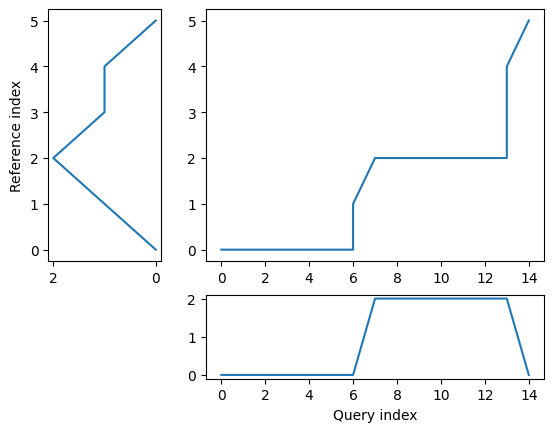

In [ ]:
# la primera prueba es con una serie simple de números
template = [0,1,2,1,1,0]
query =    [0,0,0,0,0,0,0,2,2,2,2,2,2,2,0]
## Find the best match with the canonical recursion formula

alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")


# Cuestión 1
Explique lo que pasa en las partes horizontales y verticales de la curva de alineamiento

**Respuesta:**

Para responder a estas preguntas, nos basaremos en el artículo *Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package*.

Una manera de visualizar los alineamientos es indicar el *query time* de manera horizontal abajo para poder recuperar los puntos que coinciden e ir escalando hacia arriba hasta que se consiga la curva de ajuste y luego moverse hacia la izquierda para conseguir el índice de la coincidencia con la referencia. Este método tiene la ventaja de exponer directamente la curva de alineamiento y es más sencillo visualizar el impacto local y global de los restrictores.

La tercera gráfica que nos aparece es la distancia entre los puntos del *query index* y del *reference index*, por lo que vemos cómo se alinean entre sí y las discrepancias que encontramos. Dado que tenemos los valores de *template* y *query* definidos, el ajuste será en base a esos dos.

<Axes: >

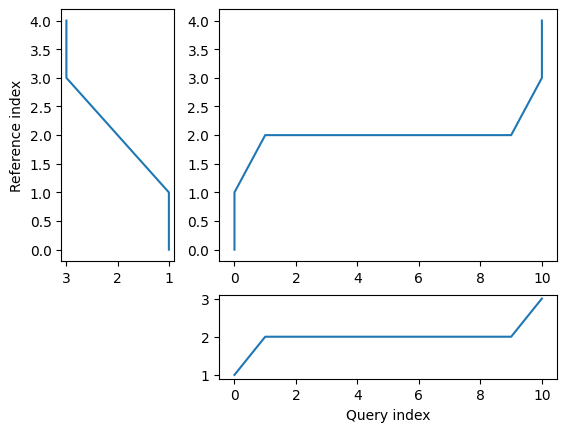

In [ ]:
# Segundo ejemplo
template = [1,1,2,3,3]
query =    [1,2,2,2,2,2,2,2,2,2,3]
alignment = dtw(query, template, keep_internals=True)
alignment.plot(type="threeway")

# Cuestión 2

Explique lo que pasa en las zonas verticales y horizontales de la curva de alineamiento

**Respuesta:**


En este caso, nuestros valores para el *Reference index* son [1,1,2,3,3] y para el *Query index* son [1,2,2,2,2,2,2,2,2,2,3]. Al hacer el ajuste entre los dos, nos sale una gráfica con una línea que se mantiene horizontal en el medio debido a los valores de 2 repetidos que tenemos en el *query index*.

<Axes: >

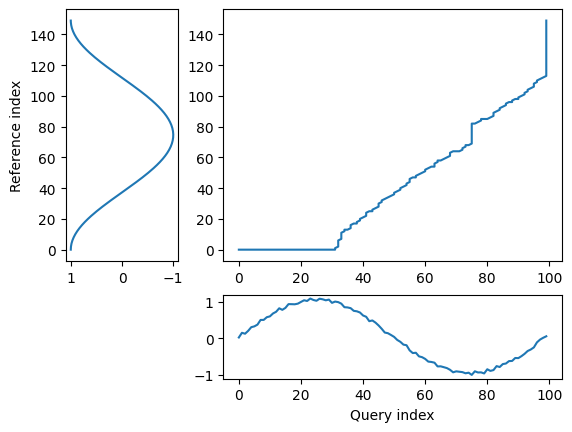

In [ ]:
# Tercer ejemplo

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
idxb= np.linspace(0,6.28,num=150)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idxb)
## Find the best match with the canonical recursion formula

alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

Este código realiza un dtw entre una señal sinusoidal con ruido (como *query*) utilizando la función np.sin(idx) + np.random.uniform(size=100)/10.0 y una señal cosenoidal (como *template*) utilizando la función np.cos(idxb).

Se utiliza la función dtw(query, template, keep_internals=True) para el dtw entre el *reference* y el *query* y el ajuste es la tercera gráfica como hemos visto en el resto de preguntas.

tamaño en muestras de la primera grabación, eje y, n= 165
tamaño en muestras de la segunda grabación, eje x, n = 160


<Axes: >

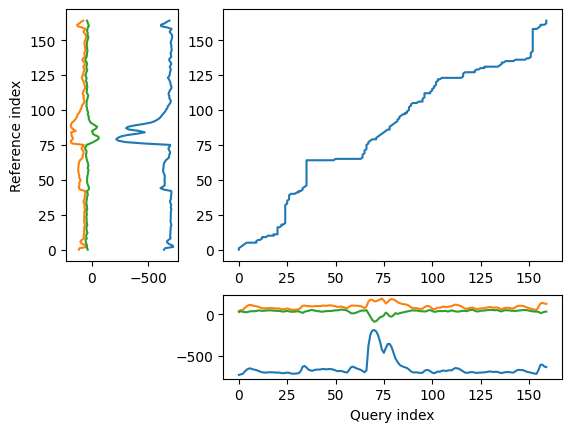

In [ ]:
# Cuarto ejemplo, ahora con nuestros valores mfcc calculados de nuestra grabación
print ("tamaño en muestras de la primera grabación, eje y, n=",len(mfcc_primero [0]))
print ("tamaño en muestras de la segunda grabación, eje x, n =",len(mfcc_segundo[0]))


alignment = dtw(mfcc_segundo.T, mfcc_primero.T, keep_internals=True)

## Display the warping curve, i.e. the alignment curve

alignment.plot(type="threeway")


# Cuestión 3
Explique por qué hay tres ondas en los ejes x e y

**Respuesta:**

Eje x (Segunda grabación):

La primera gráfica (*query index*) representa los índices de las muestras en la segunda grabación de audio (MFCC de la segunda grabación). Cada punto en esta onda corresponde a un índice en el eje x de la matriz mfcc_segundo.T; como tenemos 3 índices, hay 3 ondas.

Eje y (Primera grabación):

La segunda gráfica (*reference index*) representa los índices de las muestras en la primera grabación de audio (MFCC de la primera grabación). Cada punto en esta onda corresponde a un índice en el eje y de la matriz mfcc_primero.T; como tenemos 3 índices, hay 3 ondas.

A pesar de tener tres ondas en los ejes x e y, en la tércera gráfica vemos solo una, ya que es el ajuste haciendo el dtw de ambas grabaciones (pata_xxx_1.wav y pata_xxx_2.wav)